In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('austin_temp.csv')

In [0]:
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,


In [0]:
df = df.loc[:, ['Date', 'TempAvgF']]
df.head()

,Date,TempAvgF
0,2013-12-21,60
1,2013-12-22,48
2,2013-12-23,45
3,2013-12-24,46
4,2013-12-25,50


In [0]:
df.loc[:, 'Year'] = df.loc[:, 'Date'].str.slice(0, 4).astype('int')
df.loc[:, 'Month'] = df.loc[:, 'Date'].str.slice(5, 7).astype('int')
df.loc[:, 'Day'] = df.loc[:, 'Date'].str.slice(8, 10).astype('int')
df = df.loc[df.index < 365]
window = 20
rolling = df.TempAvgF.rolling(window).mean()
print(df.head())
print(df.tail())
print(rolling.head())
print(rolling.tail())

         Date  TempAvgF  Year  Month  Day
0  2013-12-21        60  2013     12   21
1  2013-12-22        48  2013     12   22
2  2013-12-23        45  2013     12   23
3  2013-12-24        46  2013     12   24
4  2013-12-25        50  2013     12   25
           Date  TempAvgF  Year  Month  Day
360  2014-12-16        55  2014     12   16
361  2014-12-17        51  2014     12   17
362  2014-12-18        55  2014     12   18
363  2014-12-19        53  2014     12   19
364  2014-12-20        52  2014     12   20
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: TempAvgF, dtype: float64
360    59.8
361    59.7
362    59.6
363    59.0
364    58.0
Name: TempAvgF, dtype: float64


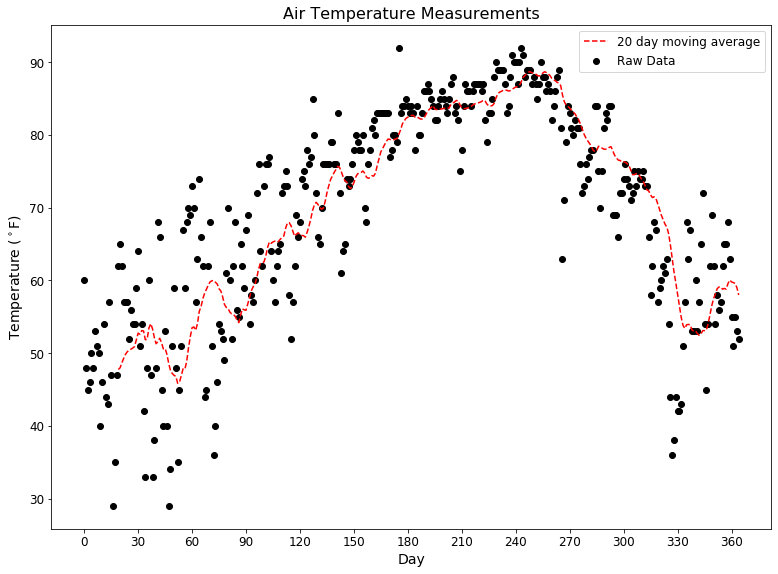

In [0]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
#
# Raw data
#
ax.scatter(df.index, 
           df.TempAvgF, 
           label = 'Raw Data', c = 'k')
#
# Moving averages
#
ax.plot(rolling.index, 
        rolling, 
        c = 'r', 
        linestyle = '--', 
        label = f'{window} day moving average')
#
ax.set_title('Air Temperature Measurements',
             fontsize = 16)
ax.set_xlabel('Day', 
              fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$F)', 
              fontsize = 14)
ax.set_xticks(range(df.index.min(), 
                    df.index.max(), 
                    30))
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)
